[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


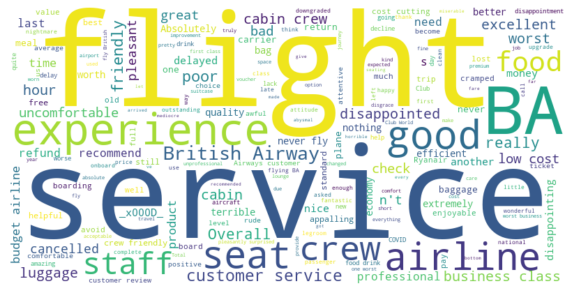

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stop words data
nltk.download('stopwords')
nltk.download('punkt')

urls = [
    'https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/7/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/8/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/9/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/10/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/11/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/12/?sortby=post_date%3ADesc&pagesize=100', 
    'https://www.airlinequality.com/airline-reviews/british-airways/page/13/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/14/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/15/?sortby=post_date%3ADesc&pagesize=100',
    'https://www.airlinequality.com/airline-reviews/british-airways/page/16/?sortby=post_date%3ADesc&pagesize=100'   
]

# Initialize an empty list to store the elements
elements_list = []

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    elements_with_class_content = soup.find_all(class_='text_header')
    elements_list.extend(elements_with_class_content)

# Convert the list to a pandas DataFrame
data = pd.DataFrame({'text_header': [elem.text for elem in elements_list]})

# Save the DataFrame to an Excel file named 'dataBritishAirways.xlsx'
data.to_excel('dataBritishAirways.xlsx', index=False)

# Read the data from the saved Excel file
data = pd.read_excel('dataBritishAirways.xlsx')

# Combine all the text from 'text_header' column into a single text string
text_data = ' '.join(data['text_header'].tolist())

# Tokenize the text into words
words = word_tokenize(text_data)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Combine the filtered words into a single text string
filtered_text_data = ' '.join(filtered_words)

# Generate the Word Cloud from the filtered text data
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(filtered_text_data)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()


In [2]:
pip install nltk gensim pandas xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [4]:
from gensim import corpora, models

# Step 1: Prepare the Text Data
# Assuming you have a DataFrame 'data' with a 'text_header' column containing the text data
# Example: data = pd.read_excel('dataBritishAirways.xlsx')

# Tokenize and preprocess the text data
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalpha() and word not in stop_words]

data['processed_text'] = data['text_header'].apply(preprocess_text)

# Step 2: Create a Document-Term Matrix
dictionary = corpora.Dictionary(data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

# Step 3: Train the Topic Model (LDA in this example)
num_topics = 5  # Set the number of topics you want to extract
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Step 4: Interpret the Topics
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx}: {topic}\n')

# Optional: Visualize the Topics (requires pyLDAvis library)
import pyLDAvis.gensim_models
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.081*"flight" + 0.056*"crew" + 0.040*"good" + 0.026*"service" + 0.026*"cabin" + 0.025*"friendly" + 0.018*"staff" + 0.012*"pleasant" + 0.012*"experience" + 0.011*"cancelled"

Topic 1: 0.057*"service" + 0.052*"airline" + 0.028*"customer" + 0.017*"seat" + 0.016*"excellent" + 0.014*"cost" + 0.013*"low" + 0.011*"experience" + 0.010*"better" + 0.009*"great"

Topic 2: 0.099*"ba" + 0.027*"british" + 0.026*"airways" + 0.023*"never" + 0.015*"fly" + 0.011*"recommend" + 0.010*"would" + 0.010*"food" + 0.010*"experience" + 0.010*"seats"

Topic 3: 0.039*"service" + 0.022*"really" + 0.020*"food" + 0.018*"good" + 0.018*"bad" + 0.018*"money" + 0.017*"experience" + 0.015*"poor" + 0.013*"refund" + 0.011*"worth"

Topic 4: 0.030*"class" + 0.027*"experience" + 0.023*"seats" + 0.022*"business" + 0.022*"worst" + 0.018*"disappointed" + 0.017*"uncomfortable" + 0.014*"staff" + 0.012*"disappointing" + 0.010*"service"



In [7]:
# Import the necessary libraries
!pip install textblob
import pandas as pd
from textblob import TextBlob

# Step 1: Read data from the Excel file
# Replace 'data.xlsx' with the path to your Excel file
file_path = 'dataBritishAirways.xlsx'
df = pd.read_excel(file_path)

# Step 2: Perform sentiment analysis on the data
for index, row in df.iterrows():
    sample_text = row['text_header']  # Replace 'text_column' with the actual column name containing text data
    blob = TextBlob(sample_text)
    sentiment_score = blob.sentiment.polarity

    # Display the sentiment score
    print("Sentiment Score for row", index+1, ":", sentiment_score)

    # Determine the sentiment label based on the score
    if sentiment_score > 0:
        print("Sentiment: Positive")
    elif sentiment_score < 0:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")
    print("\n")


Sentiment Score for row 1 : -0.125
Sentiment: Negative


Sentiment Score for row 2 : 0.52
Sentiment: Positive


Sentiment Score for row 3 : 0.7
Sentiment: Positive


Sentiment Score for row 4 : 0.2
Sentiment: Positive


Sentiment Score for row 5 : -0.25
Sentiment: Negative


Sentiment Score for row 6 : -0.3
Sentiment: Negative


Sentiment Score for row 7 : -1.0
Sentiment: Negative


Sentiment Score for row 8 : 0.0
Sentiment: Neutral


Sentiment Score for row 9 : 0.0
Sentiment: Neutral


Sentiment Score for row 10 : 0.0
Sentiment: Neutral


Sentiment Score for row 11 : 0.35
Sentiment: Positive


Sentiment Score for row 12 : -0.5
Sentiment: Negative


Sentiment Score for row 13 : -1.0
Sentiment: Negative


Sentiment Score for row 14 : 0.0
Sentiment: Neutral


Sentiment Score for row 15 : 0.8
Sentiment: Positive


Sentiment Score for row 16 : 0.0
Sentiment: Neutral


Sentiment Score for row 17 : 0.0
Sentiment: Neutral


Sentiment Score for row 18 : 0.2
Sentiment: Positive


Sentiment Scor

Sentiment Score for row 200 : 0.0
Sentiment: Neutral


Sentiment Score for row 201 : -0.2
Sentiment: Negative


Sentiment Score for row 202 : 0.0
Sentiment: Neutral


Sentiment Score for row 203 : 0.0
Sentiment: Neutral


Sentiment Score for row 204 : 0.0
Sentiment: Neutral


Sentiment Score for row 205 : 0.35
Sentiment: Positive


Sentiment Score for row 206 : 0.7
Sentiment: Positive


Sentiment Score for row 207 : 0.275
Sentiment: Positive


Sentiment Score for row 208 : 0.29545454545454547
Sentiment: Positive


Sentiment Score for row 209 : 0.0
Sentiment: Neutral


Sentiment Score for row 210 : 0.9533333333333333
Sentiment: Positive


Sentiment Score for row 211 : -0.39
Sentiment: Negative


Sentiment Score for row 212 : 0.2
Sentiment: Positive


Sentiment Score for row 213 : 0.4166666666666667
Sentiment: Positive


Sentiment Score for row 214 : 0.13636363636363635
Sentiment: Positive


Sentiment Score for row 215 : 0.0
Sentiment: Neutral


Sentiment Score for row 216 : 0.0
Sentimen

Sentiment Score for row 341 : 0.0
Sentiment: Neutral


Sentiment Score for row 342 : 0.0
Sentiment: Neutral


Sentiment Score for row 343 : -0.4
Sentiment: Negative


Sentiment Score for row 344 : -1.0
Sentiment: Negative


Sentiment Score for row 345 : 0.225
Sentiment: Positive


Sentiment Score for row 346 : 0.1
Sentiment: Positive


Sentiment Score for row 347 : 0.5
Sentiment: Positive


Sentiment Score for row 348 : -0.05
Sentiment: Negative


Sentiment Score for row 349 : 0.0
Sentiment: Neutral


Sentiment Score for row 350 : 0.0
Sentiment: Neutral


Sentiment Score for row 351 : 0.2
Sentiment: Positive


Sentiment Score for row 352 : -1.0
Sentiment: Negative


Sentiment Score for row 353 : 0.08333333333333333
Sentiment: Positive


Sentiment Score for row 354 : 0.5
Sentiment: Positive


Sentiment Score for row 355 : 0.0
Sentiment: Neutral


Sentiment Score for row 356 : 0.0
Sentiment: Neutral


Sentiment Score for row 357 : 1.0
Sentiment: Positive


Sentiment Score for row 358 : 0

Sentiment Score for row 527 : 0.0
Sentiment: Neutral


Sentiment Score for row 528 : 0.0
Sentiment: Neutral


Sentiment Score for row 529 : 0.0
Sentiment: Neutral


Sentiment Score for row 530 : 0.0
Sentiment: Neutral


Sentiment Score for row 531 : 0.0
Sentiment: Neutral


Sentiment Score for row 532 : 0.0
Sentiment: Neutral


Sentiment Score for row 533 : 0.0
Sentiment: Neutral


Sentiment Score for row 534 : 0.0
Sentiment: Neutral


Sentiment Score for row 535 : 0.55
Sentiment: Positive


Sentiment Score for row 536 : 0.334375
Sentiment: Positive


Sentiment Score for row 537 : -0.3
Sentiment: Negative


Sentiment Score for row 538 : -1.0
Sentiment: Negative


Sentiment Score for row 539 : 0.8
Sentiment: Positive


Sentiment Score for row 540 : 0.0
Sentiment: Neutral


Sentiment Score for row 541 : -0.78
Sentiment: Negative


Sentiment Score for row 542 : 0.0
Sentiment: Neutral


Sentiment Score for row 543 : -0.30000000000000004
Sentiment: Negative


Sentiment Score for row 544 : 0

Sentiment Score for row 712 : 0.0
Sentiment: Neutral


Sentiment Score for row 713 : -0.5
Sentiment: Negative


Sentiment Score for row 714 : 0.9533333333333333
Sentiment: Positive


Sentiment Score for row 715 : 0.0
Sentiment: Neutral


Sentiment Score for row 716 : -0.75
Sentiment: Negative


Sentiment Score for row 717 : -0.35
Sentiment: Negative


Sentiment Score for row 718 : -0.635
Sentiment: Negative


Sentiment Score for row 719 : -1.0
Sentiment: Negative


Sentiment Score for row 720 : -0.15
Sentiment: Negative


Sentiment Score for row 721 : 0.5
Sentiment: Positive


Sentiment Score for row 722 : 0.0
Sentiment: Neutral


Sentiment Score for row 723 : 0.0
Sentiment: Neutral


Sentiment Score for row 724 : 0.1
Sentiment: Positive


Sentiment Score for row 725 : 0.16
Sentiment: Positive


Sentiment Score for row 726 : 0.475
Sentiment: Positive


Sentiment Score for row 727 : -0.125
Sentiment: Negative


Sentiment Score for row 728 : 0.5
Sentiment: Positive


Sentiment Score for 

Sentiment Score for row 918 : -0.1875
Sentiment: Negative


Sentiment Score for row 919 : 0.0
Sentiment: Neutral


Sentiment Score for row 920 : 0.13
Sentiment: Positive


Sentiment Score for row 921 : 0.0
Sentiment: Neutral


Sentiment Score for row 922 : 0.05
Sentiment: Positive


Sentiment Score for row 923 : 0.0
Sentiment: Neutral


Sentiment Score for row 924 : 0.0
Sentiment: Neutral


Sentiment Score for row 925 : 0.0
Sentiment: Neutral


Sentiment Score for row 926 : 0.0
Sentiment: Neutral


Sentiment Score for row 927 : 0.0
Sentiment: Neutral


Sentiment Score for row 928 : 0.25
Sentiment: Positive


Sentiment Score for row 929 : 0.2833333333333333
Sentiment: Positive


Sentiment Score for row 930 : 0.0
Sentiment: Neutral


Sentiment Score for row 931 : 0.0
Sentiment: Neutral


Sentiment Score for row 932 : -0.3
Sentiment: Negative


Sentiment Score for row 933 : 0.0
Sentiment: Neutral


Sentiment Score for row 934 : 0.0
Sentiment: Neutral


Sentiment Score for row 935 : 0.0
Se

Sentiment Score for row 1070 : 0.125
Sentiment: Positive


Sentiment Score for row 1071 : 0.0
Sentiment: Neutral


Sentiment Score for row 1072 : 0.0
Sentiment: Neutral


Sentiment Score for row 1073 : 0.0
Sentiment: Neutral


Sentiment Score for row 1074 : 0.8
Sentiment: Positive


Sentiment Score for row 1075 : -0.6
Sentiment: Negative


Sentiment Score for row 1076 : 0.5
Sentiment: Positive


Sentiment Score for row 1077 : 0.0
Sentiment: Neutral


Sentiment Score for row 1078 : 1.0
Sentiment: Positive


Sentiment Score for row 1079 : -0.15
Sentiment: Negative


Sentiment Score for row 1080 : 0.0
Sentiment: Neutral


Sentiment Score for row 1081 : -1.0
Sentiment: Negative


Sentiment Score for row 1082 : 0.375
Sentiment: Positive


Sentiment Score for row 1083 : 0.0
Sentiment: Neutral


Sentiment Score for row 1084 : 0.0
Sentiment: Neutral


Sentiment Score for row 1085 : 0.1
Sentiment: Positive


Sentiment Score for row 1086 : -0.6999999999999998
Sentiment: Negative


Sentiment Scor

Sentiment Score for row 1286 : 0.4
Sentiment: Positive


Sentiment Score for row 1287 : -0.3277777777777778
Sentiment: Negative


Sentiment Score for row 1288 : 0.0
Sentiment: Neutral


Sentiment Score for row 1289 : -0.16666666666666666
Sentiment: Negative


Sentiment Score for row 1290 : 0.0
Sentiment: Neutral


Sentiment Score for row 1291 : -0.4
Sentiment: Negative


Sentiment Score for row 1292 : -1.0
Sentiment: Negative


Sentiment Score for row 1293 : 1.0
Sentiment: Positive


Sentiment Score for row 1294 : 0.0
Sentiment: Neutral


Sentiment Score for row 1295 : 0.0
Sentiment: Neutral


Sentiment Score for row 1296 : 0.0
Sentiment: Neutral


Sentiment Score for row 1297 : 0.5
Sentiment: Positive


Sentiment Score for row 1298 : 0.65
Sentiment: Positive


Sentiment Score for row 1299 : 0.0
Sentiment: Neutral


Sentiment Score for row 1300 : -0.52
Sentiment: Negative


Sentiment Score for row 1301 : 0.0
Sentiment: Neutral


Sentiment Score for row 1302 : 0.0
Sentiment: Neutral


S

Sentiment Score for row 1486 : 0.5
Sentiment: Positive


Sentiment Score for row 1487 : 0.2
Sentiment: Positive


Sentiment Score for row 1488 : -0.35
Sentiment: Negative


Sentiment Score for row 1489 : 0.55
Sentiment: Positive


Sentiment Score for row 1490 : 0.0
Sentiment: Neutral


Sentiment Score for row 1491 : -0.52
Sentiment: Negative


Sentiment Score for row 1492 : 0.0
Sentiment: Neutral


Sentiment Score for row 1493 : 0.0
Sentiment: Neutral


Sentiment Score for row 1494 : 0.0
Sentiment: Neutral


Sentiment Score for row 1495 : 0.0
Sentiment: Neutral


Sentiment Score for row 1496 : 0.0
Sentiment: Neutral


Sentiment Score for row 1497 : -0.7
Sentiment: Negative


Sentiment Score for row 1498 : 0.2
Sentiment: Positive


Sentiment Score for row 1499 : 0.0
Sentiment: Neutral


Sentiment Score for row 1500 : -0.3499999999999999
Sentiment: Negative


Sentiment Score for row 1501 : 0.0
Sentiment: Neutral


Sentiment Score for row 1502 : 0.0
Sentiment: Neutral


Sentiment Score fo

In [8]:
# Import the necessary libraries
import pandas as pd
from textblob import TextBlob

# Step 1: Read data from the Excel file
# Replace 'data.xlsx' with the path to your Excel file
file_path = 'dataBritishAirways.xlsx'
df = pd.read_excel(file_path)

# Initialize counters for positive, negative, and neutral sentiments
positive_count = 0
negative_count = 0
neutral_count = 0

# Step 2: Perform sentiment analysis on the data
for index, row in df.iterrows():
    sample_text = row['text_header']  # Replace 'text_column' with the actual column name containing text data
    blob = TextBlob(sample_text)
    sentiment_score = blob.sentiment.polarity

    # Determine the sentiment label based on the score
    if sentiment_score > 0:
        positive_count += 1
    elif sentiment_score < 0:
        negative_count += 1
    else:
        neutral_count += 1

# Display the total counts of positive, negative, and neutral sentiments
print("Total Positive Sentiments:", positive_count)
print("Total Negative Sentiments:", negative_count)
print("Total Neutral Sentiments:", neutral_count)


Total Positive Sentiments: 531
Total Negative Sentiments: 412
Total Neutral Sentiments: 657


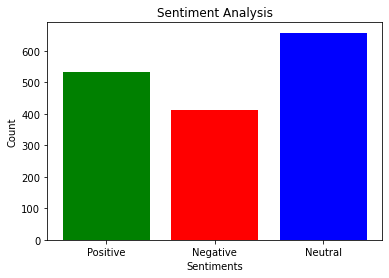

In [9]:
import matplotlib.pyplot as plt

# Sample counts of positive, negative, and neutral sentiments
positive_count = positive_count
negative_count = negative_count
neutral_count = neutral_count

# Step 3: Plot the bar chart
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()
